In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor


In [2]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [148]:
def bipartiteWalk(N,n,qreg,qcoin):
    qc = QuantumCircuit(qreg,qcoin,name='BipartiteGraph')
    qc.x(qreg[N-1])
    qc.swap(qreg[0:N-1],qcoin[0:n])
    return qc
    
def simul(qc):
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc,backend,shots=3000).result().get_counts()
    return result


In [142]:
def markedList(markedList,N,n,dif):
    if(dif==False):    
        oracleList = np.ones(2**N)
        for element in markedList:
            oracleList[element] = -1
    if(dif==True):
        oracleList = np.ones(2**n)
        for element in markedList:
            oracleList[element] = -1

    return oracleList.tolist()

def diffusion(N,n):
    qreg = QuantumRegister(N)
    qcoin = QuantumRegister(n)
    difCirc = QuantumCircuit(qreg,qcoin,name='Diffusion')
    difCirc.h(qcoin)
    
    aux = markedList([0],N,n,True)
    qcAux = oracle(aux,N,n,True)
    difCirc.append(qcAux,range(n+N))
    difCirc.h(qcoin)

    difCirc = transpile(difCirc,basis_gates=['cx','H','swap','u3','x'],optimization_level=3)
    return difCirc

In [145]:
def oracle(markedList,N,n,dif):
    qreg = QuantumRegister(N)
    qcoin = QuantumRegister(n)
    qc = QuantumCircuit(qreg,qcoin,name='Oracle')
    if(dif==True):
        qc.diagonal(markedList,qcoin)
    else:
        qc.diagonal(markedList,qreg)
    qc = transpile(qc,basis_gates=['cx','H','swap','u3','x'],optimization_level=3)
    return qc

def runWalkBipartite2(qreg,qcoin,creg,markedVertex,N,n,times):
    qc = QuantumCircuit(qreg,qcoin,creg)
    markedVertex=markedList(markedVertex,N,n,False)
    qcOracle = oracle(markedVertex,N,n,False)
    qcDif = diffusion(N,n)
    qcQWalk = bipartiteWalk(N,n,qreg,qcoin)
    qc.h(qreg)
    for i in range(times):
        qc.append(qcOracle,range(n+N))
        qc.barrier()
        qc.append(qcDif,range(n+N))
        qc.barrier()
        qc.append(qcQWalk,range(n+N))
        qc.barrier()

        
    qc = transpile(qc,basis_gates=['cx','H','swap','u3','x'],optimization_level=3)
    qc.measure(range(N),range(N))
        
    return qc

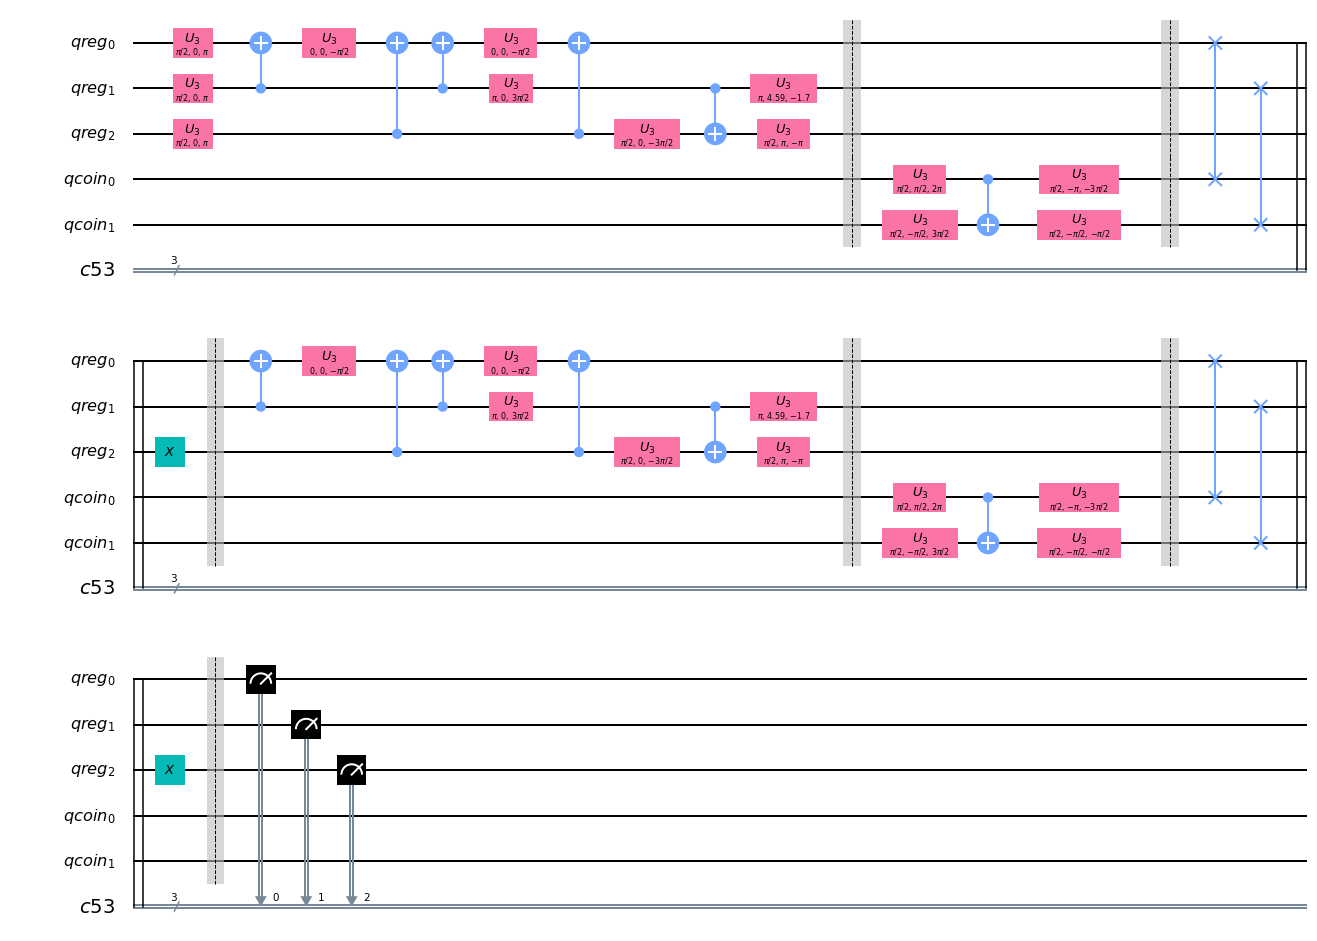

In [150]:
N=3
n=N-1
qreg = QuantumRegister(N,'qreg')
qcoin = QuantumRegister(n,'qcoin')
creg = ClassicalRegister(N)

qc =runWalk2(qreg,qcoin,creg,[0,7],N,n,2)
#qc = diffusion(N,n)
qc.draw(output='mpl')


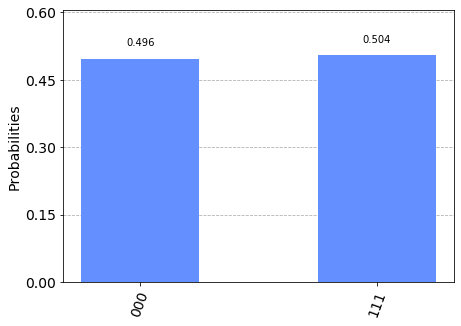

In [151]:
plot_histogram(simul(qc))

In [ ]:
from qiskit.providers.ibmq import least_busy
minQubits = 10

large_enough_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > minQubits  and not x.configuration().simulator)

leastBusybackend = least_busy(large_enough_devices)
altBackend = provider.get_backend('ibmq_paris')
altBackend2 = provider.get_backend('ibmq_cambridge')

In [ ]:
def simul(qc):
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc,backend,shots=3000).result().get_counts()
    return result

In [ ]:
def run(circuit, backend, **kwargs):
    if type(backend) is str:
        backend = Aer.get_backend(backend)
    return execute(circuit, backend, **kwargs)

def printFound(results,collisions):
    for key in results:
        if(result_counts[key]>collisions):
          print(key, '->', result_counts[key])

In [ ]:
print("The best backend is " + leastBusybackend.name())
print("The alt backend is " + altBackend.name())
print("The alt2 backend is " + altBackend2.name())

In [1]:
altBackend.jobs(limit=50, skip=0, status=None, db_filter=None)

NameError: name 'jobs' is not defined